# Import packages, configure settings

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn import over_sampling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn.decomposition import PCA

In [ ]:
pd.set_option('float_format', '{:.2f}'.format)
# pd.reset_option('float_format')

# Data loading and preprocessing

## Data loading

In [ ]:
y_name = 'SeriousDlqin2yrs'

In [ ]:
!gdown 1uFw0wpZmlz2MI_aX0YQTvrt9JHKSiewU
!gdown 1AVCe4cw35VS-hZ9wneKuhwphIuo0djo0
!gdown 1AUueFXlegO_94o-dqZesIhX9lqpd-y2M
!gdown 1kOtwXPsrVW0esebkl_HKTTTfu-na8JxY

!mkdir GiveMeSomeCredit
!mv cs-test.csv cs-training.csv "Data Dictionary.xls" sampleEntry.csv GiveMeSomeCredit

Downloading...
From: https://drive.google.com/uc?id=1uFw0wpZmlz2MI_aX0YQTvrt9JHKSiewU
To: /content/cs-test.csv
100% 4.98M/4.98M [00:00<00:00, 29.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AVCe4cw35VS-hZ9wneKuhwphIuo0djo0
To: /content/cs-training.csv
100% 7.56M/7.56M [00:00<00:00, 40.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AUueFXlegO_94o-dqZesIhX9lqpd-y2M
To: /content/Data Dictionary.xls
100% 14.8k/14.8k [00:00<00:00, 41.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1kOtwXPsrVW0esebkl_HKTTTfu-na8JxY
To: /content/sampleEntry.csv
100% 1.91M/1.91M [00:00<00:00, 12.7MB/s]


In [ ]:
df = pd.read_csv('GiveMeSomeCredit/cs-training.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00
1,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00
2,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00
3,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00
4,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.04,74,0,0.23,2100.00,4,0,1,0,0.00
149996,0,0.30,44,0,0.72,5584.00,4,0,1,0,2.00
149997,0,0.25,58,0,3870.00,NaN,18,0,1,0,0.00
149998,0,0.00,30,0,0.00,5716.00,4,0,0,0,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [ ]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


## Splitting sets

In [ ]:
X = df.drop(columns=[y_name])
y = df[y_name].to_frame()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_dtypes = X_train.dtypes.to_dict()

## Imputation for NaN values

In [ ]:
imputer = SimpleImputer(strategy='median')

X_train_raw = X_train.copy()
y_train_raw = y_train.copy()

# Only perform data cleaning on train set
X_train = pd.DataFrame(imputer.fit_transform(
    X_train), columns=X_train.columns, index=X_train.index).astype(X_dtypes)

In [ ]:
X_train_raw.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
RevolvingUtilizationOfUnsecuredLines,120000.00,5.63,247.02,0.00,0.00,0.00,0.03,0.15,0.56,0.98,1.00,50708.00
age,120000.00,52.28,14.76,21.00,29.00,33.00,41.00,52.00,63.00,72.00,78.00,109.00
NumberOfTime30-59DaysPastDueNotWorse,120000.00,0.42,4.19,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,98.00
DebtRatio,120000.00,351.04,1941.11,0.00,0.00,0.03,0.18,0.37,0.87,1261.00,2451.05,326442.00
MonthlyIncome,96311.00,6678.38,15294.05,0.00,1300.00,2001.00,3400.00,5400.00,8250.00,11643.00,14583.00,3008750.00
NumberOfOpenCreditLinesAndLoans,120000.00,8.46,5.15,0.00,2.00,3.00,5.00,8.00,11.00,15.00,18.00,58.00
NumberOfTimes90DaysLate,120000.00,0.27,4.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,98.00
NumberRealEstateLoansOrLines,120000.00,1.02,1.13,0.00,0.00,0.00,0.00,1.00,2.00,2.00,3.00,54.00
NumberOfTime60-89DaysPastDueNotWorse,120000.00,0.24,4.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,98.00
NumberOfDependents,116873.00,0.76,1.12,0.00,0.00,0.00,0.00,0.00,1.00,2.00,3.00,13.00


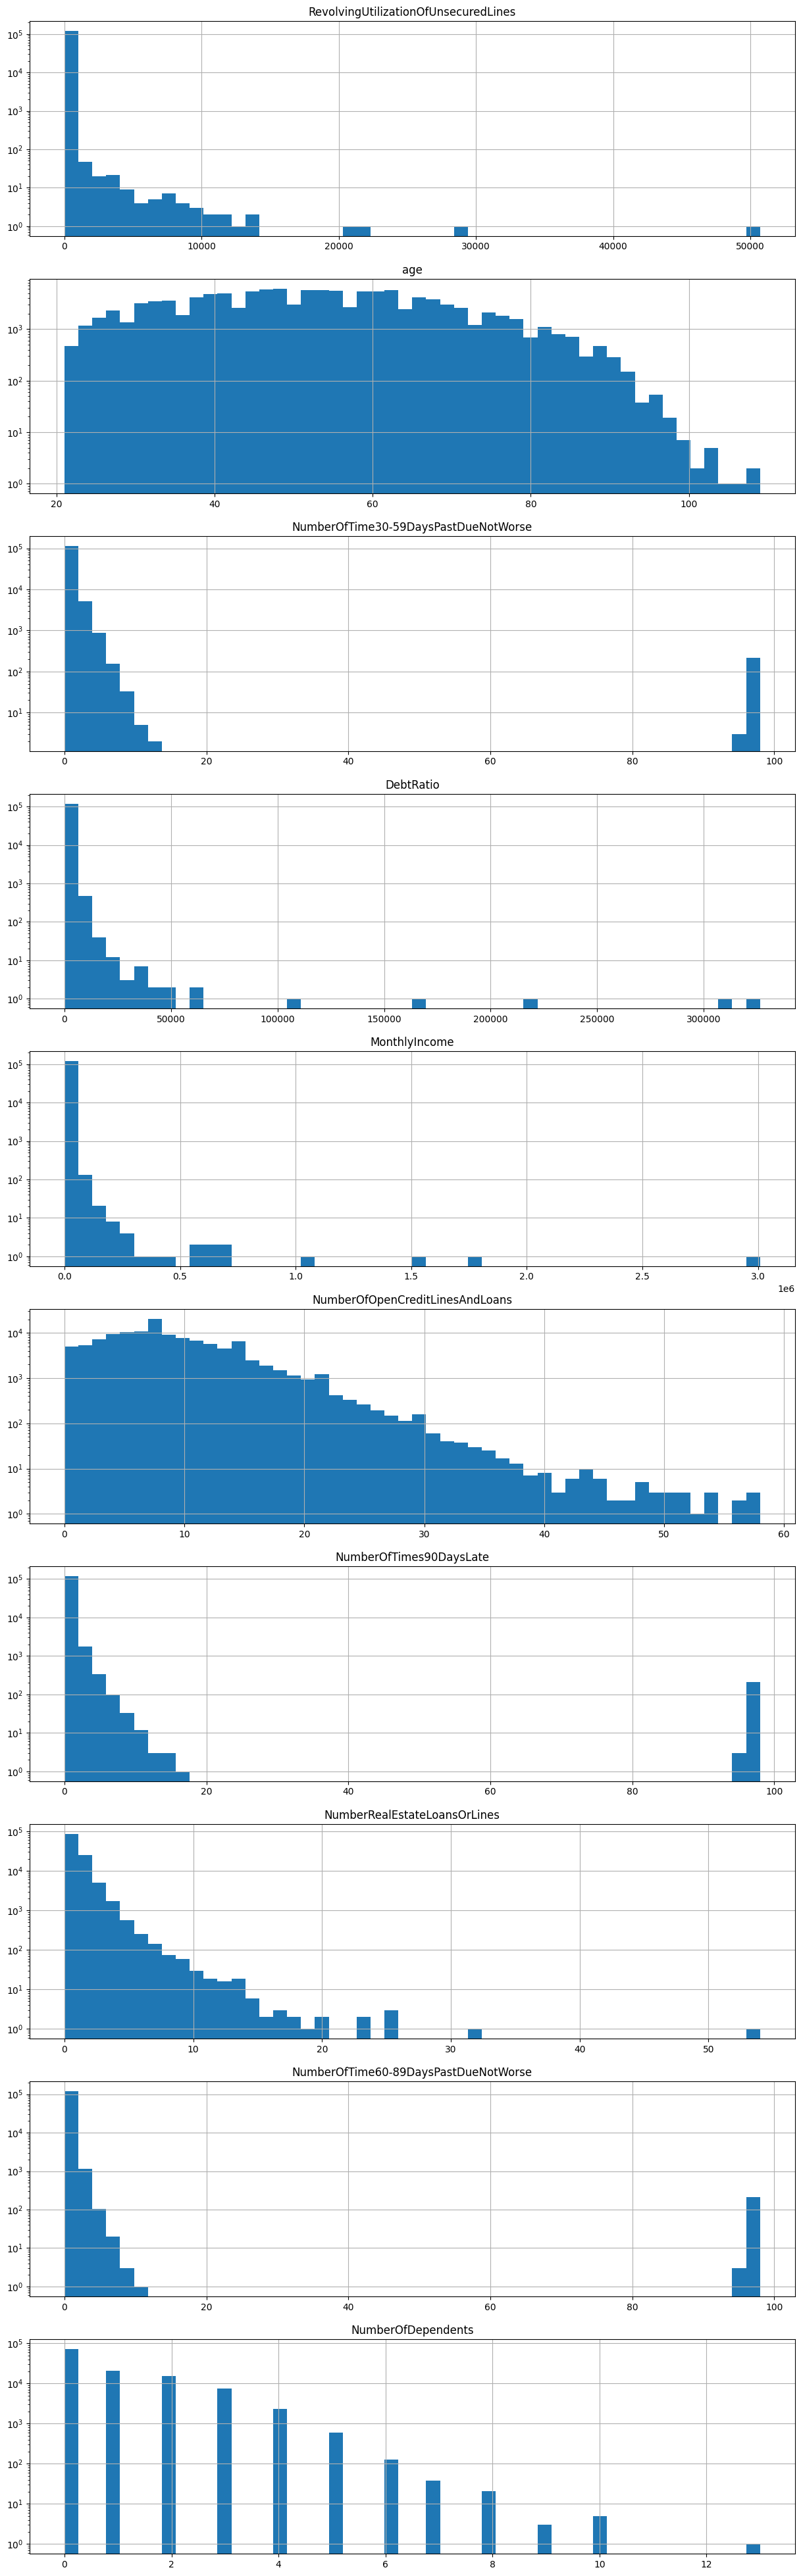

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=len(
    X_train.columns), figsize=(15, 50))

for i, col in enumerate(X_train.columns):
    X_train[col].hist(bins=50, ax=axes[i], log=True)
    axes[i].set_title(f'{col}')
plt.show()

## Pruning outliers

The outliers observed are humongous, they skewed both means and stds.<br>
This way, we cannot use simple z-score to detect outliers.

In [ ]:
alpha = 0.1
threshold = 4
rows_after_pruning = ((X_train >= X_train.quantile(alpha/2) / threshold)
                      & (X_train <= X_train.quantile(1 - alpha/2) * threshold)).all(axis=1)
X_train_pruned = X_train[rows_after_pruning]
y_train_pruned = y_train[rows_after_pruning]
df_pruned = pd.concat([y_train_pruned, X_train_pruned], axis=1)


In [ ]:
X_train_pruned.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112608.00,112608.00,112608.00,112608.00,112608.00,112608.00,112608.00,112608.00,112608.00,112608.00
mean,0.32,52.36,0.25,320.61,6336.72,8.71,0.07,1.05,0.06,0.75
std,0.35,14.44,0.70,968.82,4158.56,5.05,0.37,1.07,0.30,1.11
min,0.00,21.00,0.00,0.00,375.00,1.00,0.00,0.00,0.00,0.00
25%,0.03,42.00,0.00,0.19,4000.00,5.00,0.00,0.00,0.00,0.00
50%,0.15,52.00,0.00,0.38,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.53,63.00,0.00,0.83,7500.00,11.00,0.00,2.00,0.00,1.00
max,4.00,109.00,8.00,9768.00,54000.00,57.00,4.00,12.00,4.00,10.00


In [ ]:
y_train_pruned.describe()


,SeriousDlqin2yrs
count,112608.00
mean,0.06
std,0.25
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,1.00


In [ ]:
y_train_pruned.value_counts()

SeriousDlqin2yrs
0                   105305
1                     7303
dtype: int64

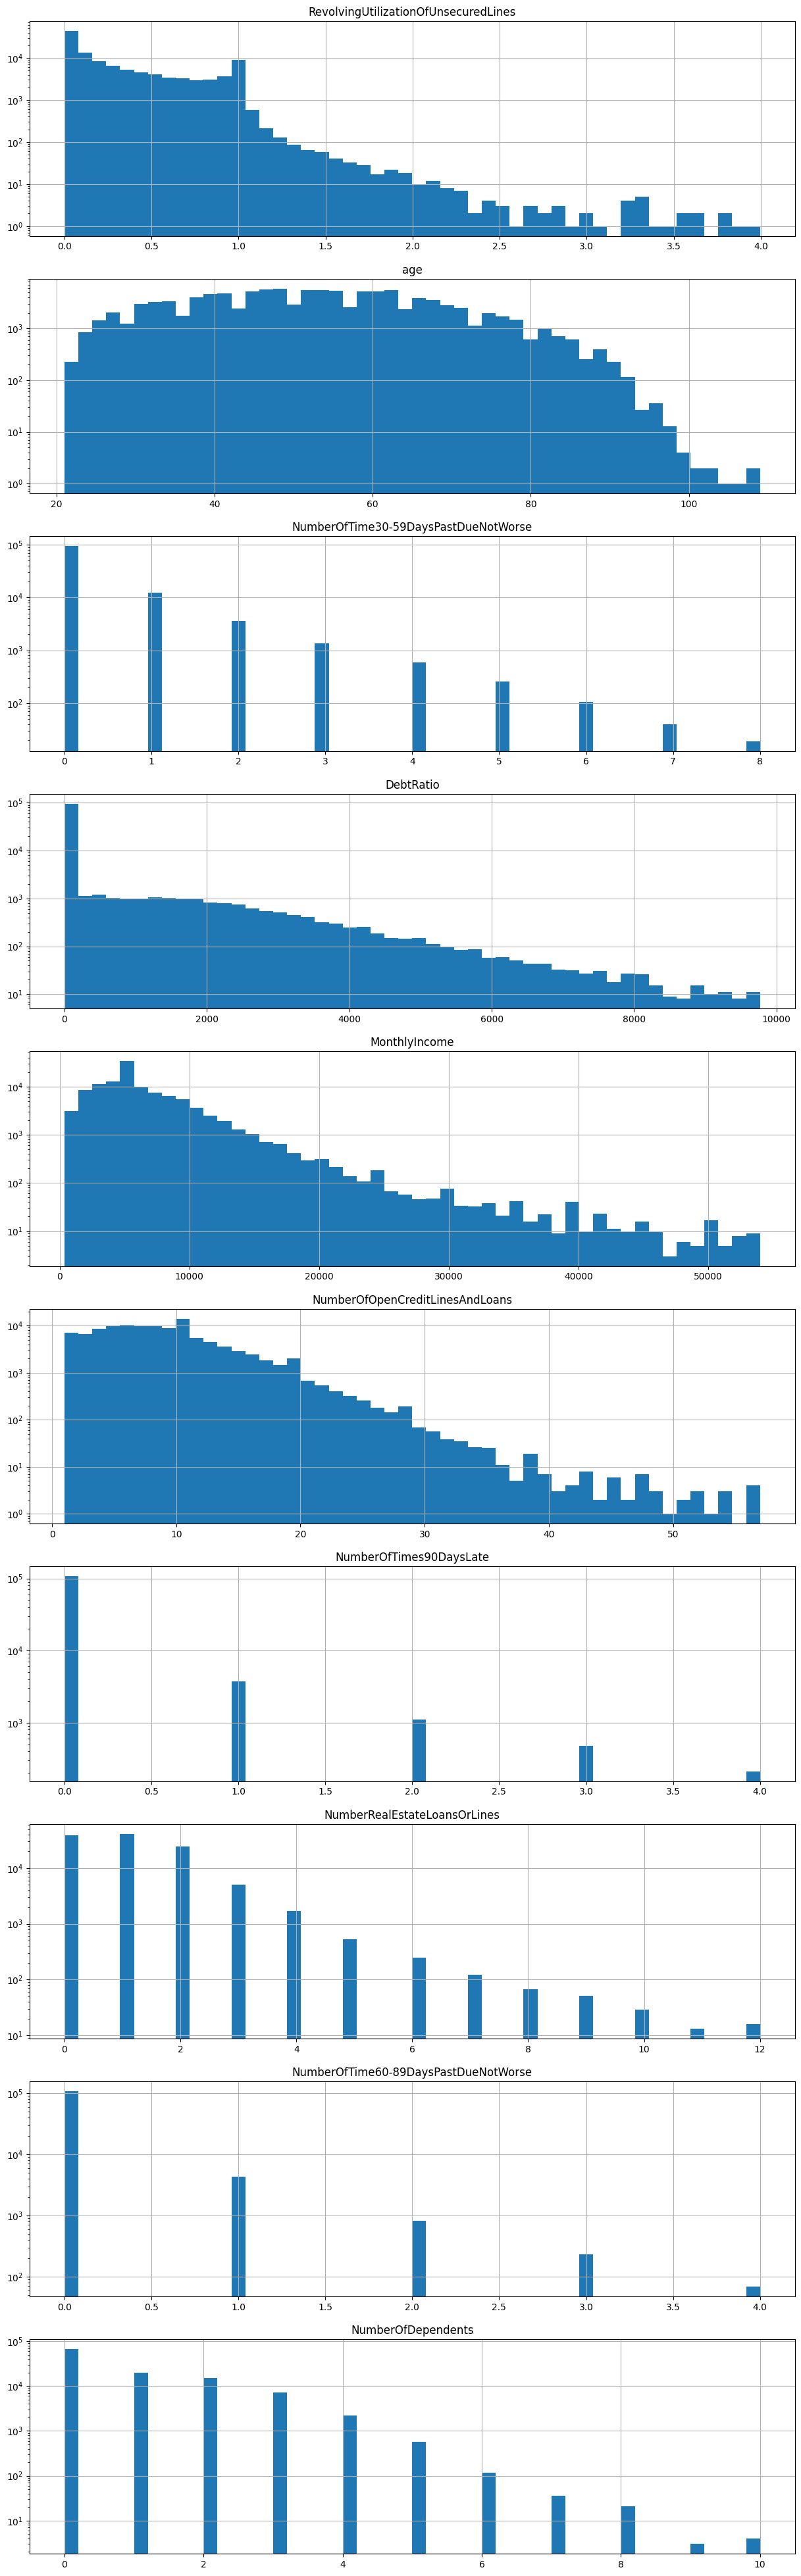

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=len(
    X_train_pruned.columns), figsize=(15, 50))

for i, col in enumerate(X_train_pruned.columns):
    X_train_pruned[col].hist(bins=50, ax=axes[i], log=True)
    axes[i].set_title(f'{col}')
plt.show()

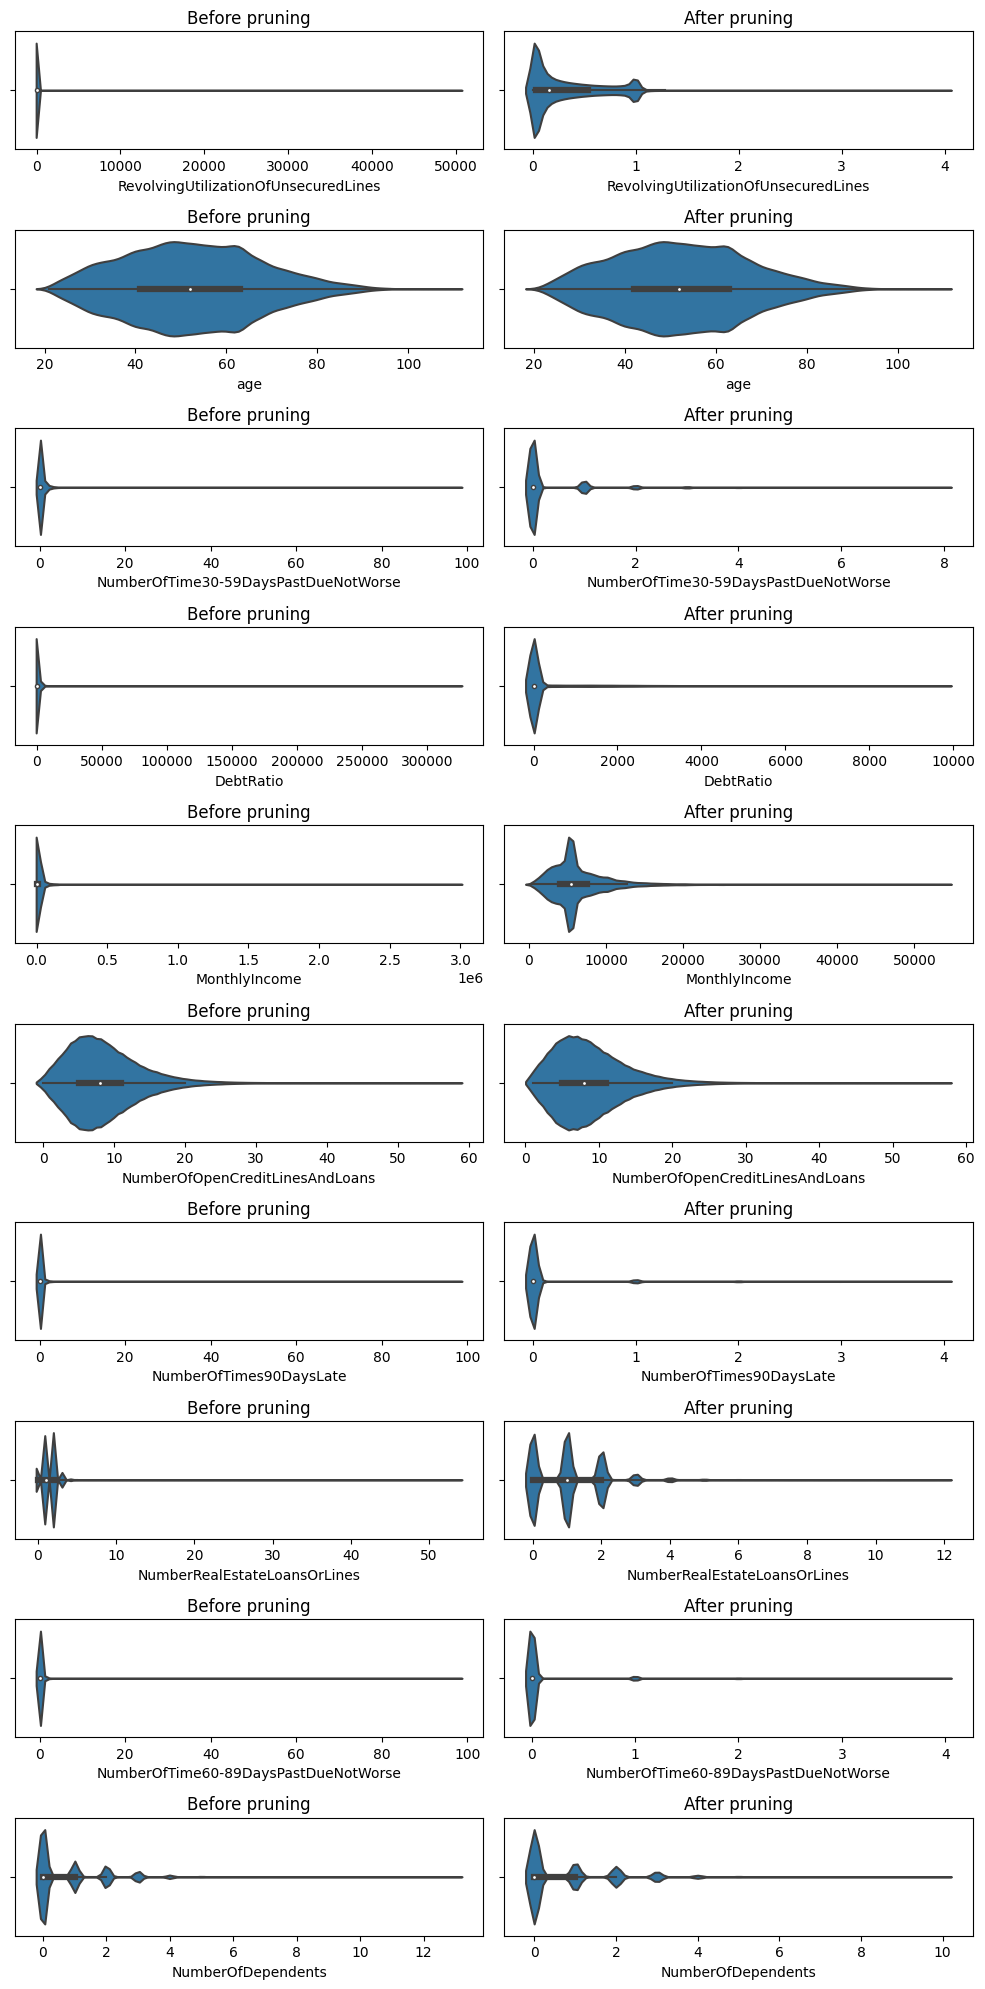

In [ ]:
df1 = X_train.copy()
df2 = X_train_pruned.copy()

# Create a figure with subplots for each column
fig, axes = plt.subplots(ncols=2, nrows=len(df2.columns), figsize=(10, 20))

# Create violin plots for each column in Dataset 1
for i, column in enumerate(df1.columns):
    sns.violinplot(x=df1[column], ax=axes[i, 0])
    # df1[col].hist(bins=50, ax=axes[i, 1])
    axes[i, 0].set_title(f'Before pruning')

# Create violin plots for each column in Dataset 2
for i, column in enumerate(df2.columns):
    sns.violinplot(x=df2[column], ax=axes[i, 1])
    # df2[col].hist(bins=50, ax=axes[i, 3])
    axes[i, 1].set_title(f'After pruning')

plt.tight_layout()
plt.show()


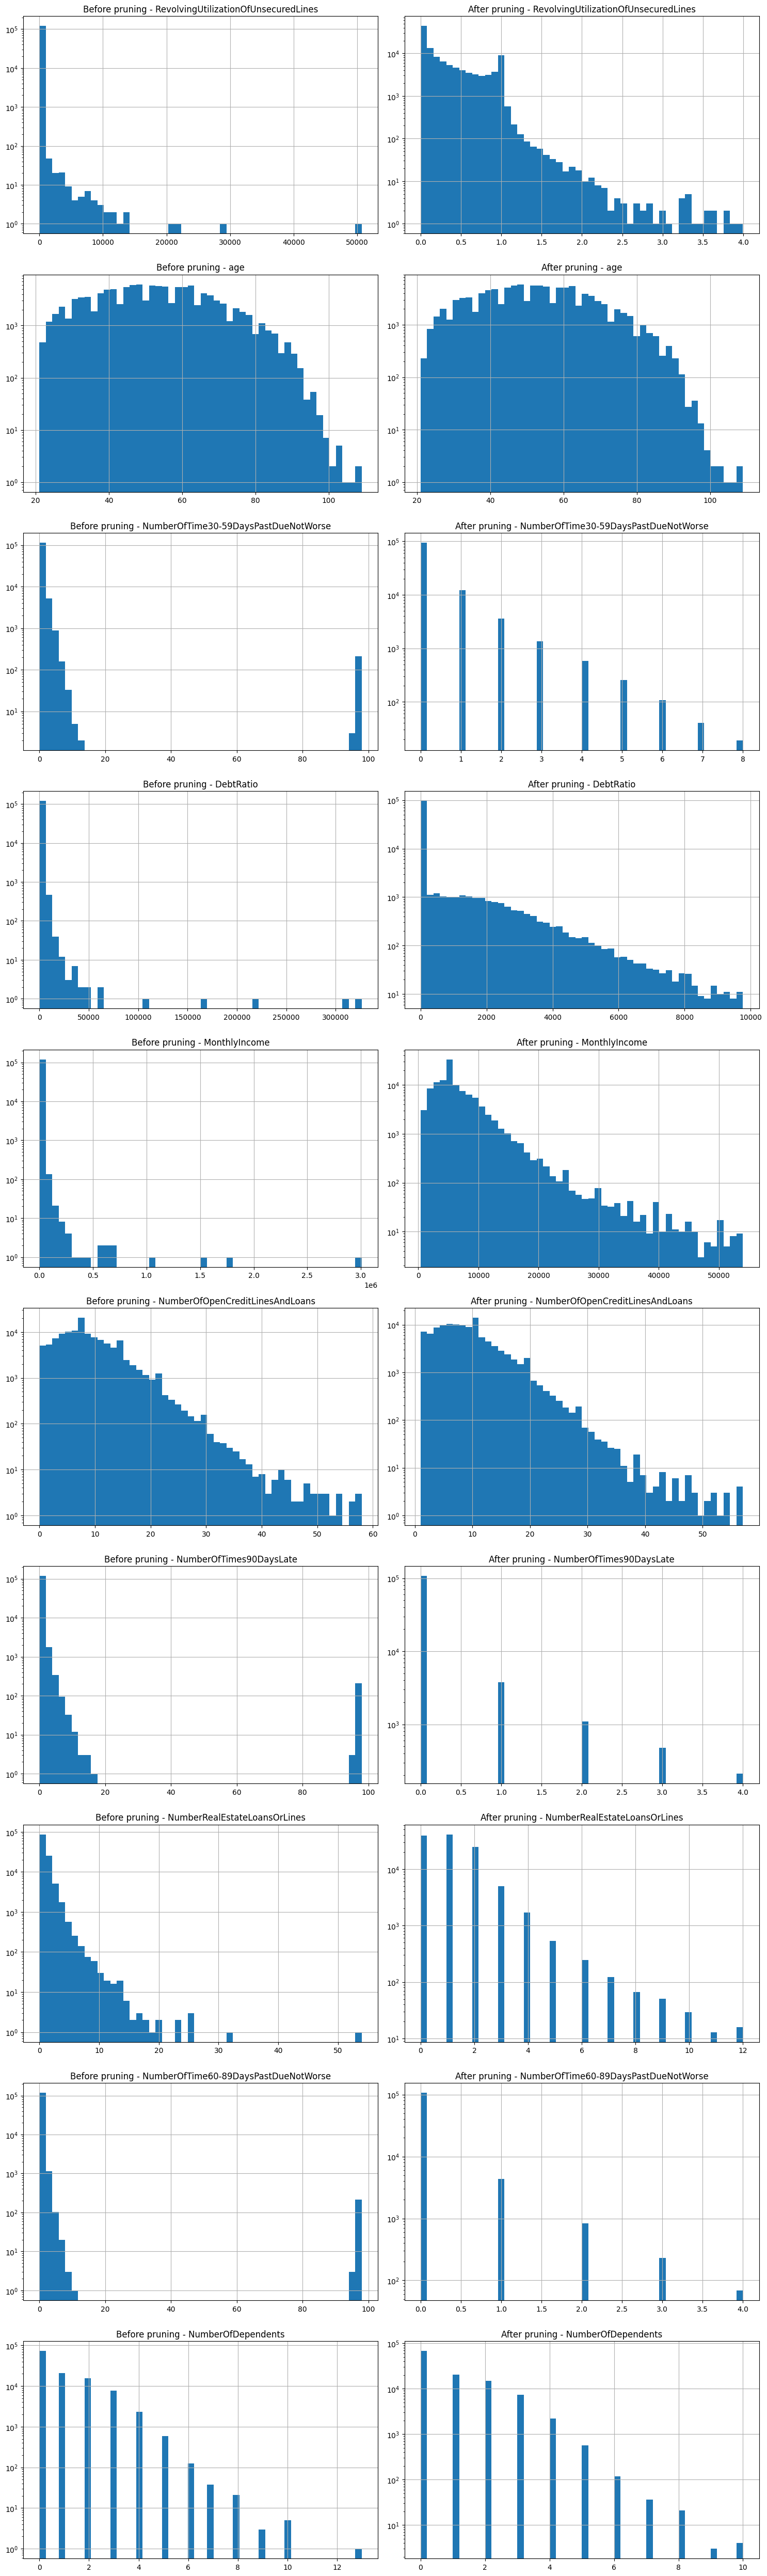

In [ ]:
# Create a figure with subplots for each column
fig, axes = plt.subplots(ncols=2, nrows=len(df2.columns), figsize=(15, 50))

# Create violin plots for each column in Dataset 1
for i, column in enumerate(df1.columns):
    # sns.violinplot(x=df1[column], ax=axes[i, 0])
    df1[column].hist(bins=50, ax=axes[i, 0], log=True)
    axes[i, 0].set_title(f'Before pruning - {column}')

# Create violin plots for each column in Dataset 2
for i, column in enumerate(df2.columns):
    # sns.violinplot(x=df2[column], ax=axes[i, 1])
    df2[column].hist(bins=50, ax=axes[i, 1], log=True)
    axes[i, 1].set_title(f'After pruning - {column}')

plt.tight_layout()
plt.show()


## Oversampling for imbalanced data

In [ ]:
std_scaler = preprocessing.StandardScaler()
X_train_pruned_std = std_scaler.fit_transform(X_train_pruned)
X_train_pruned_std = pd.DataFrame(X_train_pruned_std, columns=X_train_pruned.columns,
             index=X_train_pruned.index)

In [ ]:
# SMOTE uses kNN to oversample. Therefore, the data must be scaled.
smote = over_sampling.SMOTE(random_state=42)
X_train_pruned_std_oversample, y_train_pruned_oversample = smote.fit_resample(
    X_train_pruned_std, y_train_pruned)

# over_sampler = over_sampling.RandomOverSampler(random_state=42)
# X_train_pruned_std_oversample, y_train_pruned_oversample = over_sampler.fit_resample(
#     X_train_pruned_std, y_train_pruned)


In [ ]:
def pie(data, ax, title='Title'):
    def pct(pct_data, data):
        absolute = int(np.round(pct_data/100*np.sum(data)))
        return f'{absolute}'

    ax.pie(data,
           labels=[i[0] for i in data.keys()],
           autopct=lambda x: pct(x, data),
           )
    ax.set(title=title)

In [ ]:
y_train_raw.value_counts()

SeriousDlqin2yrs
0                   111930
1                     8070
dtype: int64

In [ ]:
len(X_train_raw)

120000

In [ ]:
!mkdir img

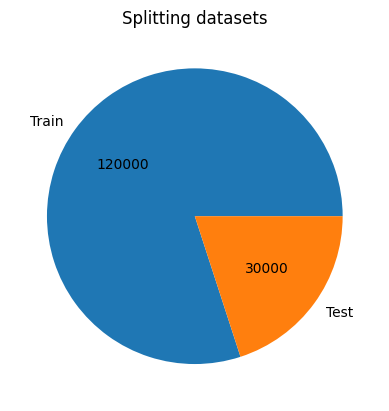

In [ ]:
ax = plt.subplot()
pie(pd.Series({('Train', 0): len(X_train_raw), ('Test', 0): len(X_test)}),
    ax, 'Splitting datasets')
plt.savefig('img/splitting_datasets.png', dpi=1000)
plt.show()

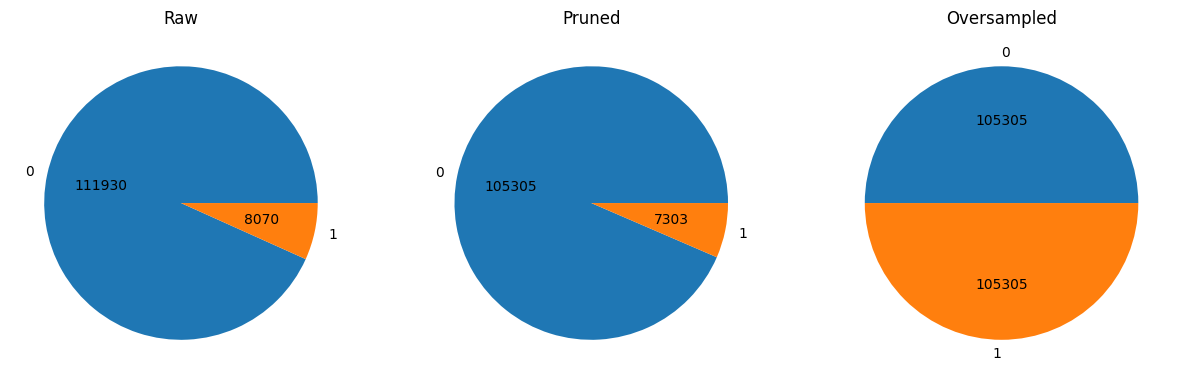

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 50))
pie(y_train_raw.value_counts(), ax[0], 'Raw')
# pie(pd.Series({('Train', 0): 120000, ('Test', 0): 30000}), ax[0], 'Splitting datasets')
pie(y_train_pruned.value_counts(), ax[1], 'Pruned')
pie(y_train_pruned_oversample.value_counts(), ax[2], 'Oversampled')
plt.show()

In [ ]:
X_train_clean = pd.DataFrame(std_scaler.inverse_transform(
    X_train_pruned_std_oversample), columns=X_train_pruned.columns).astype(X_dtypes)
y_train_clean = y_train_pruned_oversample.copy()
# X_train_clean_std = X_train_pruned_std_oversample.copy()
X_train_clean_std = X_train_pruned_std_oversample.copy()
df_clean = pd.concat([y_train_clean,X_train_clean], axis=1)
df_clean_std = pd.concat([y_train_clean,X_train_clean_std], axis=1)

In [ ]:
std_scaler_2 = preprocessing.StandardScaler()
sth = std_scaler_2.fit_transform(X_train_clean)
X_train_clean_2 = pd.DataFrame(std_scaler_2.inverse_transform(
    sth), columns=X_train_pruned.columns).astype(X_dtypes)
X_train_clean_std_2 = pd.DataFrame(sth, columns=X_train_pruned.columns).astype(X_dtypes)
X_train_clean_std_2

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-1.20,-1,0,-0.31,-0.41,0,0,0,0,-0.73
1,0.27,0,0,-0.31,-1.05,0,0,0,0,-0.73
2,-1.20,0,0,-0.31,-0.45,-1,0,0,0,2.80
3,-0.23,0,0,-0.31,0.78,-1,0,0,0,3.69
4,-1.20,-1,0,-0.31,-0.04,0,0,0,0,-0.73
...,...,...,...,...,...,...,...,...,...,...
210605,1.16,0,0,-0.31,-0.08,0,0,0,0,1.04
210606,0.50,0,0,0.08,-0.14,-1,0,0,0,-0.73
210607,1.26,-1,0,-0.31,-0.99,0,0,0,0,-0.73
210608,1.26,0,0,2.90,-0.14,0,0,0,0,-0.73


In [ ]:
X_train_clean_std.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,210610.00,210610.00,210610.00,210610.00,210610.00,210610.00,210610.00,210610.00,210610.00,210610.00
mean,0.49,-0.21,0.48,-0.04,-0.09,-0.05,0.57,-0.03,0.47,0.07
std,1.16,0.95,1.55,0.95,0.94,1.01,1.98,1.06,1.84,1.02
min,-0.90,-2.17,-0.36,-0.33,-1.43,-1.53,-0.20,-0.98,-0.20,-0.68
25%,-0.67,-0.93,-0.36,-0.33,-0.63,-0.74,-0.20,-0.98,-0.20,-0.68
50%,0.31,-0.26,-0.36,-0.33,-0.23,-0.16,-0.20,-0.05,-0.20,-0.68
75%,1.68,0.45,1.08,-0.33,0.14,0.45,-0.20,0.88,-0.20,0.61
max,10.48,3.92,11.13,9.75,11.46,9.57,10.67,10.19,12.96,8.32


In [ ]:
X_train_clean_std_2.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,210610.00,210610.00,210610.00,210610.00,210610.00,210610.00,210610.00,210610.00,210610.00,210610.00
mean,0.00,0.03,0.17,0.00,-0.00,0.04,0.19,0.12,0.26,0.00
std,1.00,0.68,0.66,1.00,1.00,0.73,0.75,0.56,0.80,1.00
min,-1.20,-2.00,0.00,-0.31,-1.42,-1.00,0.00,0.00,0.00,-0.73
25%,-1.00,0.00,0.00,-0.31,-0.57,0.00,0.00,0.00,0.00,-0.73
50%,-0.16,0.00,0.00,-0.31,-0.14,0.00,0.00,0.00,0.00,-0.73
75%,1.03,0.00,0.00,-0.31,0.24,0.00,0.00,0.00,0.00,0.53
max,8.64,4.00,6.00,10.34,12.30,9.00,5.00,9.00,6.00,8.10


In [ ]:
df_clean

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.00,29,0,0.01,4342.00,5,0,0,0,0.00
1,0,0.60,55,0,0.84,1833.00,11,0,1,0,0.00
2,0,0.00,43,0,0.04,4166.00,2,0,0,0,4.00
3,0,0.39,40,0,0.06,9000.00,2,0,0,0,5.00
4,0,0.00,35,0,0.13,5800.00,12,0,1,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
210605,1,0.96,38,0,0.76,5649.14,8,0,2,0,2.00
210606,1,0.69,42,0,357.84,5400.00,2,1,0,0,0.00
210607,1,1.00,32,0,0.02,2076.80,4,0,0,0,0.00
210608,1,1.00,50,0,2940.58,5400.00,4,0,1,0,0.00


## Check correlation of the pre-processed data

In [ ]:
# Correlation around 0 means no actual correlation between the 2 attributes
df.corr().SeriousDlqin2yrs.sort_values(key=lambda x: abs(x), ascending=False)

SeriousDlqin2yrs                        1.00
NumberOfTime30-59DaysPastDueNotWorse    0.13
NumberOfTimes90DaysLate                 0.12
age                                    -0.12
NumberOfTime60-89DaysPastDueNotWorse    0.10
NumberOfDependents                      0.05
NumberOfOpenCreditLinesAndLoans        -0.03
MonthlyIncome                          -0.02
DebtRatio                              -0.01
NumberRealEstateLoansOrLines           -0.01
RevolvingUtilizationOfUnsecuredLines   -0.00
Name: SeriousDlqin2yrs, dtype: float64

In [ ]:
df_clean.corr().SeriousDlqin2yrs.sort_values(key=lambda x: abs(x), ascending=False)


SeriousDlqin2yrs                        1.00
RevolvingUtilizationOfUnsecuredLines    0.49
NumberOfTimes90DaysLate                 0.33
NumberOfTime30-59DaysPastDueNotWorse    0.33
NumberOfTime60-89DaysPastDueNotWorse    0.29
age                                    -0.26
MonthlyIncome                          -0.11
NumberOfOpenCreditLinesAndLoans        -0.09
NumberOfDependents                      0.08
NumberRealEstateLoansOrLines           -0.08
DebtRatio                              -0.05
Name: SeriousDlqin2yrs, dtype: float64

In [ ]:
df_pruned.corr().SeriousDlqin2yrs.sort_values(key=lambda x: abs(x), ascending=False)


SeriousDlqin2yrs                        1.00
NumberOfTimes90DaysLate                 0.33
RevolvingUtilizationOfUnsecuredLines    0.28
NumberOfTime30-59DaysPastDueNotWorse    0.28
NumberOfTime60-89DaysPastDueNotWorse    0.27
age                                    -0.11
MonthlyIncome                          -0.05
NumberOfDependents                      0.05
NumberOfOpenCreditLinesAndLoans        -0.02
DebtRatio                              -0.02
NumberRealEstateLoansOrLines           -0.01
Name: SeriousDlqin2yrs, dtype: float64

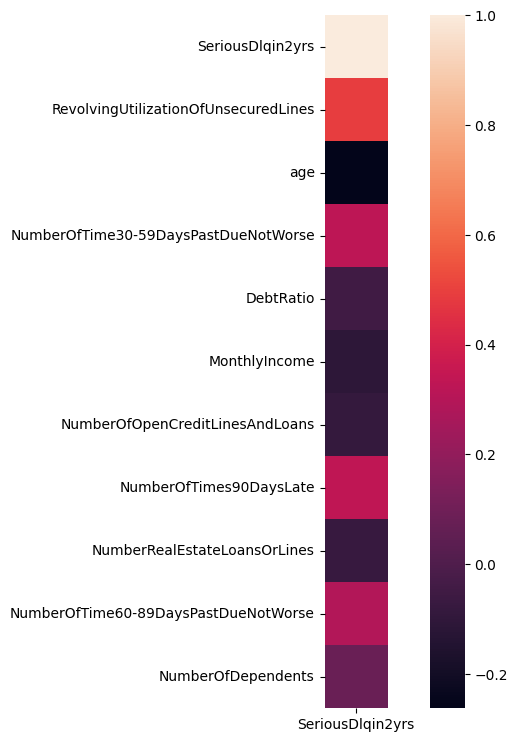

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_clean.corr()[y_name].to_frame(), square=True)
plt.show()

We may consider removing attributes with low correlation to the output.

# Pre-process test data

In [ ]:
X_test_imputed = pd.DataFrame(imputer.transform(
    X_test), columns=X_train.columns, index=X_test.index)
X_test_clipped = X_test.clip(lower=X_train_clean.min().values,
                             upper=X_train_clean.max().values)
X_test_clean = pd.DataFrame(imputer.transform(
    X_test_clipped), columns=X_train_clean.columns, index=X_test_clipped.index)
X_test_clean_std = pd.DataFrame(std_scaler.transform(
    X_test_clean), columns=X_train_clean.columns, index=X_test_clipped.index)


In [ ]:
clip_df = pd.DataFrame(
    {'Min': X_train_clean.min().values, 'Max': X_train_clean.max()}, index=X_train_clean.min().keys()).T.astype(dtype=X_dtypes)
imputer_df = pd.DataFrame(imputer.statistics_, index=X_train_clean.columns, columns=[
                          'Imputation data']).T.astype(dtype=X_dtypes)
std_df = pd.DataFrame({'Mean': std_scaler.mean_, 'Std': np.sqrt(
    std_scaler.var_)}, index=X_train_clean.columns).T.astype(dtype=X_dtypes)


# Export pre-processed data

In [ ]:
with pd.ExcelWriter('data_clean.xlsx', engine='xlsxwriter') as writer:
    df.to_excel(writer, sheet_name='Raw', index=False)
    df_clean.to_excel(writer, sheet_name='Train clean', index=False)
    df_clean_std.to_excel(writer, sheet_name='Train clean std', index=False)
    X_test_clean.to_excel(writer, sheet_name='X test clean', index=False)
    X_test_clean_std.to_excel(writer, sheet_name='X test clean std', index=False)
    y_test.to_excel(writer, sheet_name='y test', index=False)
    imputer_df.to_excel(writer, sheet_name='Imputation data')
    clip_df.to_excel(writer, sheet_name='Clipping data')
    std_df.to_excel(writer, sheet_name='Standardization data')


ModuleNotFoundError: ignored

# Classify pipeline

In [ ]:
def generate_pipes(pipe_config):
  pipe_config = [list(step.items()) for _, step in pipe_config]
  pipe_config = list(itertools.product(*pipe_config))
  pipe_names = list(map(lambda steps: [name for name,_ in steps], pipe_config))
  pipe_names = list(map(lambda L: ">".join(L), pipe_names))
  pipes = [Pipeline(cfg) for cfg in pipe_config]
  return dict(zip(pipe_names, pipes))

In [ ]:
# Define methods for scaling features
scalers = {
    "StandardScaler": StandardScaler()
}
reducers = {
    'PCA': PCA()
}

# Define methods for classifying samples
classifiers = {
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
}

pipe_steps = [
    ('scaler', scalers),
    ('reducers', reducers),
    ('classifier', classifiers)
]

# Define parameters for each method
parameters = {
    "StandardScaler__with_mean": [True, False],
    "StandardScaler__with_std": [True, False],
    "KNeighborsClassifier__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "DecisionTreeClassifier__max_depth": list(range(1, 60, 5)),
    "RandomForestClassifier__n_estimators": [50, 100],
    "PCA__n_components": [0.90, .95, 0.98]
}


In [ ]:
pipe_mapper = generate_pipes(pipe_steps)

## Accuracy as best score

In [ ]:
def find_hyperparams(pipe_mapper):
  print("Start the tunning process ...")
  best_pipes = {}
  results = []
  for idx, pipe_name in enumerate(list(pipe_mapper.keys())):
    print(f"{idx + 1}. Tuning pipe: {pipe_name}")

    # Select parameters related to the current pipeline:
    param_grid = {}
    for step_name in pipe_name.split('>'):
      for param_name in parameters.keys():
        if param_name.startswith(step_name):
          param_grid[param_name] = parameters[param_name]

    # Create a finder and search for the best parameters
    pipe = pipe_mapper[pipe_name]
    finder = GridSearchCV(pipe, param_grid=param_grid, cv=5,
                          scoring= "accuracy",
                          refit= True)

    finder.fit(X_train_clean, y_train_clean.SeriousDlqin2yrs)
    print("\t best-params: {:>15s}".format(str(finder.best_params_)))
    print(f"\t best-score (accuracy): {finder.best_score_:15.2f}")
    print()

    # Store best pipe
    best_pipes[pipe_name] = finder.best_estimator_

    # Add results to a dataframe
    rs_item = {"Method": pipe_name, "Accuracy": finder.best_score_}
    for key, value in finder.best_params_.items():
      rs_item[key] = value
    results.append(rs_item)

  print("The tunning is done!")
  tuned_table = pd.DataFrame(results)
  tuned_table.set_index('Method')
  return tuned_table, best_pipes

In [ ]:
tuned_table, best_pipes = find_hyperparams(pipe_mapper)

Start the tunning process ...
1. Tuning pipe: StandardScaler>PCA>KNeighborsClassifier
	 best-params: {'KNeighborsClassifier__n_neighbors': 1, 'PCA__n_components': 0.95, 'StandardScaler__with_mean': True, 'StandardScaler__with_std': True}
	 best-score (accuracy):            0.92

2. Tuning pipe: StandardScaler>PCA>DecisionTreeClassifier
	 best-params: {'DecisionTreeClassifier__max_depth': 26, 'PCA__n_components': 0.98, 'StandardScaler__with_mean': True, 'StandardScaler__with_std': True}
	 best-score (accuracy):            0.86

3. Tuning pipe: StandardScaler>PCA>RandomForestClassifier
	 best-params: {'PCA__n_components': 0.95, 'RandomForestClassifier__n_estimators': 100, 'StandardScaler__with_mean': False, 'StandardScaler__with_std': True}
	 best-score (accuracy):            0.92

4. Tuning pipe: StandardScaler>PCA>GaussianNB
	 best-params: {'PCA__n_components': 0.9, 'StandardScaler__with_mean': True, 'StandardScaler__with_std': True}
	 best-score (accuracy):            0.73

The tunnin

In [ ]:
# Save to file
tuned_table.to_csv("tuned_results.csv", sep=";")
# Best pipeline:
tuned_table[tuned_table["Accuracy"] == tuned_table["Accuracy"].max()].dropna(axis=1)
# Show the selected pipe
selected_pipe_name = tuned_table.Method[tuned_table["Accuracy"].argmax()]
print(f"Name of the best pipe: {selected_pipe_name}")
selected_pipe = best_pipes[selected_pipe_name]

Name of the best pipe: StandardScaler>PCA>RandomForestClassifier


## F1-score as best score

In [ ]:
def find_hyperparams_roc_auc(pipe_mapper):
  print("Start the tunning process ...")
  best_pipes = {}
  results = []
  for idx, pipe_name in enumerate(list(pipe_mapper.keys())):
    print(f"{idx + 1}. Tuning pipe: {pipe_name}")

    # Select parameters related to the current pipeline:
    param_grid = {}
    for step_name in pipe_name.split('>'):
      for param_name in parameters.keys():
        if param_name.startswith(step_name):
          param_grid[param_name] = parameters[param_name]

    # Create a finder and search for the best parameters
    pipe = pipe_mapper[pipe_name]
    finder = GridSearchCV(pipe, param_grid=param_grid, cv=5,
                          scoring= "roc_auc",
                          refit= True)

    finder.fit(X_train_clean, y_train_clean.SeriousDlqin2yrs)
    print("\t best-params: {:>15s}".format(str(finder.best_params_)))
    print(f"\t best-score (ROC-AUC): {finder.best_score_:15.2f}")
    print()

    # Store best pipe
    best_pipes[pipe_name] = finder.best_estimator_

    # Add results to a dataframe
    rs_item = {"Method": pipe_name, "ROC-AUC": finder.best_score_}
    for key, value in finder.best_params_.items():
      rs_item[key] = value
    results.append(rs_item)

  print("The tunning is done!")
  tuned_table = pd.DataFrame(results)
  tuned_table.set_index('Method')
  return tuned_table, best_pipes

In [ ]:
tuned_table_roc_auc, best_pipes_roc_auc = find_hyperparams_roc_auc(pipe_mapper)

Start the tunning process ...
1. Tuning pipe: StandardScaler>PCA>KNeighborsClassifier
	 best-params: {'KNeighborsClassifier__n_neighbors': 8, 'PCA__n_components': 0.95, 'StandardScaler__with_mean': True, 'StandardScaler__with_std': True}
	 best-score (ROC-AUC):            0.95

2. Tuning pipe: StandardScaler>PCA>DecisionTreeClassifier
	 best-params: {'DecisionTreeClassifier__max_depth': 16, 'PCA__n_components': 0.95, 'StandardScaler__with_mean': True, 'StandardScaler__with_std': True}
	 best-score (ROC-AUC):            0.87

3. Tuning pipe: StandardScaler>PCA>RandomForestClassifier
	 best-params: {'PCA__n_components': 0.95, 'RandomForestClassifier__n_estimators': 100, 'StandardScaler__with_mean': True, 'StandardScaler__with_std': True}
	 best-score (ROC-AUC):            0.97

4. Tuning pipe: StandardScaler>PCA>GaussianNB
	 best-params: {'PCA__n_components': 0.95, 'StandardScaler__with_mean': True, 'StandardScaler__with_std': True}
	 best-score (ROC-AUC):            0.81

The tunning is

In [ ]:
# Save to file
tuned_table_roc_auc.to_csv("tuned_results_roc_auc_2270712.csv", sep=";")
# Best pipeline:
tuned_table_roc_auc[tuned_table_roc_auc["ROC-AUC"] == tuned_table_roc_auc["ROC-AUC"].max()].dropna(axis=1)
# Show the selected pipe
selected_pipe_name_roc_auc = tuned_table_roc_auc.Method[tuned_table_roc_auc["ROC-AUC"].argmax()]
print(f"Name of the best pipe: {selected_pipe_name_roc_auc}")
selected_pipe_roc_auc = best_pipes_roc_auc[selected_pipe_name_roc_auc]

Name of the best pipe: StandardScaler>PCA>RandomForestClassifier


# Evaluation

In [ ]:
from sklearn.metrics import classification_report

print("Start the evaluation process ...")
y_pred = selected_pipe.predict(X_test_clean)
y_pred_roc_auc = selected_pipe_roc_auc.predict(X_test_clean)
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_roc_auc))
print("The evaluation is done!")

Start the evaluation process ...
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     28044
           1       0.26      0.55      0.35      1956

    accuracy                           0.87     30000
   macro avg       0.61      0.72      0.64     30000
weighted avg       0.92      0.87      0.89     30000

The evaluation is done!
